<a href="https://colab.research.google.com/github/hayhalo/Project-Akhir-Belajar-ML-untuk-Pemula/blob/main/%5BKlasifikasi%5D_Submission_Akhir_BMLP_Muhammad%20Husni%20Zahran%20Nugrahanto.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **1. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [1]:
# Library Dasar dan Visualisasi
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Preprocessing dan Pembagian Data
from sklearn.model_selection import train_test_split

# Model Klasifikasi
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

# Evaluasi Model
from sklearn.metrics import f1_score, accuracy_score, classification_report, confusion_matrix

# Hyperparameter Tuning
from sklearn.model_selection import GridSearchCV

# **2. Memuat Dataset dari Hasil Clustering**

Memuat dataset hasil clustering dari file CSV ke dalam variabel DataFrame.

In [24]:
df = pd.read_csv('https://raw.githubusercontent.com/hayhalo/Project-Akhir-Belajar-ML-untuk-Pemula/refs/heads/main/Dataset_inisiasi.csv')
df.head()

,TransactionID,AccountID,TransactionAmount,TransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate,TimeTransactionDifference,TransactionRate,AverageTransaction,Cluster
0,TX000001,AC00128,14.09,2023-04-11 16:29:14,Debit,San Diego,D000380,162.198.218.92,M015,ATM,70,Doctor,81,1,5112.21,2024-11-04 08:08:08,572.652014,0.002756,0.024605,0
1,TX000002,AC00455,376.24,2023-06-27 16:44:19,Debit,Houston,D000051,13.149.61.4,M052,ATM,68,Doctor,141,1,13758.91,2024-11-04 08:09:35,495.642546,0.027345,0.759095,0
2,TX000003,AC00019,126.29,2023-07-10 18:16:08,Debit,Mesa,D000235,215.97.143.157,M009,Online,19,Student,56,1,1122.35,2024-11-04 08:07:04,482.577037,0.112523,0.261699,1
3,TX000004,AC00070,184.50,2023-05-05 16:32:11,Debit,Raleigh,D000187,200.13.225.150,M002,Online,26,Student,25,1,8569.06,2024-11-04 08:09:06,548.650637,0.021531,0.336280,1
4,TX000005,AC00411,13.45,2023-10-16 17:51:24,Credit,Atlanta,D000308,65.164.3.100,M091,Online,26,Student,198,1,7429.40,2024-11-04 08:06:39,384.593924,0.001810,0.034972,1


In [27]:
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()
scaled_cols = df.drop('Cluster', axis=1).select_dtypes(include=['number']).columns
df[scaled_cols] = scaler.fit_transform(df[scaled_cols])
df.head()

,TransactionID,AccountID,TransactionAmount,TransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate,TimeTransactionDifference,TransactionRate,AverageTransaction,Cluster
0,TX000001,AC00128,-0.592378,2023-04-11 16:29:14,Debit,San Diego,D000380,162.198.218.92,M015,ATM,0.78125,Doctor,-0.321429,0.0,0.061009,2024-11-04 08:08:08,0.467785,-0.368297,-0.573199,0
1,TX000002,AC00455,0.496329,2023-06-27 16:44:19,Debit,Houston,D000051,13.149.61.4,M052,ATM,0.71875,Doctor,0.290816,0.0,1.461410,2024-11-04 08:09:35,0.053975,-0.184103,0.443562,0
2,TX000003,AC00019,-0.255079,2023-07-10 18:16:08,Debit,Mesa,D000235,215.97.143.157,M009,Online,-0.81250,Student,-0.576531,0.0,-0.585179,2024-11-04 08:07:04,-0.016233,0.453954,-0.244988,1
3,TX000004,AC00070,-0.080086,2023-05-05 16:32:11,Debit,Raleigh,D000187,200.13.225.150,M002,Online,-0.59375,Student,-0.892857,0.0,0.620873,2024-11-04 08:09:06,0.338814,-0.227657,-0.141746,1
4,TX000005,AC00411,-0.594302,2023-10-16 17:51:24,Credit,Atlanta,D000308,65.164.3.100,M091,Online,-0.59375,Student,0.872449,0.0,0.436296,2024-11-04 08:06:39,-0.542745,-0.375382,-0.558848,1


# **3. Data Splitting**

Tahap Data Splitting bertujuan untuk memisahkan dataset menjadi dua bagian: data latih (training set) dan data uji (test set).

In [28]:
numerical_cols = df.select_dtypes(include=['number']).columns
df_clas = df[numerical_cols].copy()
X_train, X_test, y_train, y_test = train_test_split(df_clas.drop('Cluster', axis=1), df_clas['Cluster'], test_size=0.3, random_state=42)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(1758, 8) (754, 8) (1758,) (754,)


# **4. Membangun Model Klasifikasi**


## **a. Membangun Model Klasifikasi**

Setelah memilih algoritma klasifikasi yang sesuai, langkah selanjutnya adalah melatih model menggunakan data latih.

Berikut adalah rekomendasi tahapannya.
1. Pilih algoritma klasifikasi yang sesuai, seperti Logistic Regression, Decision Tree, Random Forest, atau K-Nearest Neighbors (KNN).
2. Latih model menggunakan data latih.

In [29]:
# Initialize the models
models = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "K-Nearest Neighbors": KNeighborsClassifier()
}

# Dictionary to store F1 scores
f1_scores = {}

# Train each model and compute F1 score
for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    f1 = f1_score(y_test, y_pred, average='macro')
    f1_scores[model_name] = f1

# Display the F1 scores for comparison
f1_scores_df = pd.DataFrame(list(f1_scores.items()), columns=['Model', 'F1 Score'])
f1_scores_df

,Model,F1 Score
0,Logistic Regression,0.870067
1,Decision Tree,0.891173
2,Random Forest,0.895345
3,K-Nearest Neighbors,0.817670


In [30]:
# Decision Tree Model
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)

DecisionTreeClassifier()

In [31]:
# Random Forest Model
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)

RandomForestClassifier()

## **b. Evaluasi Model Klasifikasi**

Berikut adalah **rekomendasi** tahapannya.
1. Lakukan prediksi menggunakan data uji.
2. Hitung metrik evaluasi seperti Accuracy dan F1-Score (Opsional: Precision dan Recall).
3. Buat confusion matrix untuk melihat detail prediksi benar dan salah.

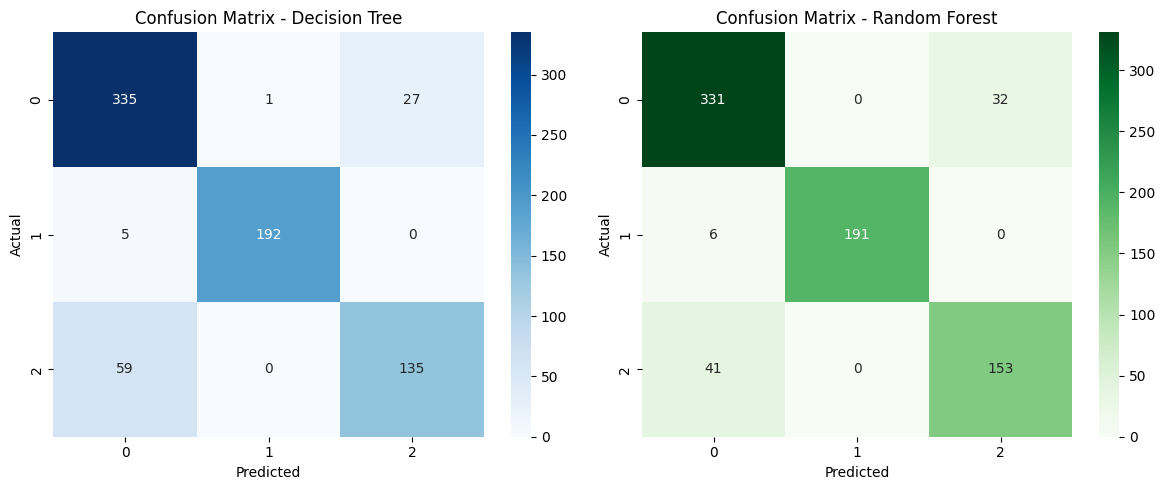

In [32]:
# Confusion Matrix Model
y_pred_dt = dt_model.predict(X_test)
y_pred_rf = rf_model.predict(X_test)

# Hitung confusion matrix untuk masing-masing model
cm_logreg = confusion_matrix(y_test, y_pred_dt)
cm_rf = confusion_matrix(y_test, y_pred_rf)

# Buat figure untuk 2 confusion matrix
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Plot confusion matrix untuk Decision Tree
sns.heatmap(cm_logreg, annot=True, fmt='d', cmap='Blues', ax=axes[0])
axes[0].set_title('Confusion Matrix - Decision Tree')
axes[0].set_xlabel('Predicted')
axes[0].set_ylabel('Actual')

# Plot confusion matrix untuk Random Forest
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Greens', ax=axes[1])
axes[1].set_title('Confusion Matrix - Random Forest')
axes[1].set_xlabel('Predicted')
axes[1].set_ylabel('Actual')

plt.tight_layout()
plt.show()

In [33]:
# Classification Report Model
report_dt = classification_report(y_test, y_pred_dt, output_dict=True)
report_rf = classification_report(y_test, y_pred_rf, output_dict=True)

# Ubah jadi DataFrame
df_logreg = pd.DataFrame(report_dt).transpose()
df_rf = pd.DataFrame(report_rf).transpose()

# Gabungkan keduanya side-by-side
comparison_df = pd.concat([df_logreg.add_suffix('_DecisionTree'),
                           df_rf.add_suffix('_RandomForest')], axis=1)

# Tampilkan hanya label kelas dan average
display(comparison_df.round(3))

,precision_DecisionTree,recall_DecisionTree,f1-score_DecisionTree,support_DecisionTree,precision_RandomForest,recall_RandomForest,f1-score_RandomForest,support_RandomForest
0,0.840,0.923,0.879,363.000,0.876,0.912,0.893,363.000
1,0.995,0.975,0.985,197.000,1.000,0.970,0.985,197.000
2,0.833,0.696,0.758,194.000,0.827,0.789,0.807,194.000
accuracy,0.878,0.878,0.878,0.878,0.895,0.895,0.895,0.895
macro avg,0.889,0.864,0.874,754.000,0.901,0.890,0.895,754.000
weighted avg,0.879,0.878,0.876,754.000,0.896,0.895,0.895,754.000


## **c. Tuning Model Klasifikasi (Optional)**

Gunakan GridSearchCV, RandomizedSearchCV, atau metode lainnya untuk mencari kombinasi hyperparameter terbaik

In [35]:
# Define the parameter grid for Decision Tree
param_grid_dt = {
    'criterion': ['gini', 'entropy'],  # Criteria to split the nodes
    'max_depth': [10, 5, None],   # Maximum depth of the tree
    'min_samples_split': [5, 10, 20, 25],   # Minimum number of samples required to split a node
    'min_samples_leaf': [2, 4, 6, 10],     # Minimum number of samples required at a leaf node
    'max_features': ['auto', 'sqrt', 'log2', None]  # Number of features to consider for splitting a node
}

# Initialize the Decision Tree model
dt_model = DecisionTreeClassifier(random_state=42)

# Initialize GridSearchCV
grid_search_dt = GridSearchCV(estimator=dt_model, param_grid=param_grid_dt,
                              cv=5, n_jobs=-1, verbose=0, scoring='accuracy')

# Fit GridSearchCV on the training data
grid_search_dt.fit(X_train, y_train)

# Print the best parameters and best score
print("Best parameters for Decision Tree:", grid_search_dt.best_params_)
print("Best cross-validation score for Decision Tree:", grid_search_dt.best_score_)

# Get the best model from GridSearchCV
best_dt_model = grid_search_dt.best_estimator_

# Evaluate the tuned model on the test set
dt_tuned_pred = best_dt_model.predict(X_test)
dt_tuned_accuracy = accuracy_score(y_test, dt_tuned_pred)
print("Tuned Decision Tree Accuracy on Test Set:", dt_tuned_accuracy)


Best parameters for Decision Tree: {'criterion': 'entropy', 'max_depth': 5, 'max_features': None, 'min_samples_leaf': 10, 'min_samples_split': 25}
Best cross-validation score for Decision Tree: 0.903303872053872
Tuned Decision Tree Accuracy on Test Set: 0.916445623342175


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
480 fits failed out of a total of 1920.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
480 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 1382, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 436, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.11/dist-packages/sklearn/uti

In [34]:
# Define a simplified parameter grid for Random Forest
param_grid_rf = {
    'n_estimators': [50, 75, 100],      # Number of trees in the forest
    'max_depth': [None, 5, 10],    # Maximum depth of the trees
    'min_samples_split': [5, 10, 15],    # Minimum number of samples required to split a node
    'min_samples_leaf': [5, 10, 15]      # Minimum number of samples required at a leaf node
}

# Initialize the Random Forest model
rf_model = RandomForestClassifier(random_state=42)

# Initialize GridSearchCV with the simplified parameter grid
grid_search_rf = GridSearchCV(estimator=rf_model, param_grid=param_grid_rf,
                              cv=5, n_jobs=-1, verbose=2, scoring='accuracy')

# Fit GridSearchCV on the training data
grid_search_rf.fit(X_train, y_train)

# Print the best parameters and best score
print("Best parameters for Random Forest:", grid_search_rf.best_params_)
print("Best cross-validation score for Random Forest:", grid_search_rf.best_score_)

# Get the best model from GridSearchCV
best_rf_model = grid_search_rf.best_estimator_

# Evaluate the tuned model on the test set
rf_tuned_pred = best_rf_model.predict(X_test)
rf_tuned_accuracy = accuracy_score(y_test, rf_tuned_pred)
print("Tuned Random Forest Accuracy on Test Set:", rf_tuned_accuracy)


Fitting 5 folds for each of 81 candidates, totalling 405 fits
Best parameters for Random Forest: {'max_depth': 10, 'min_samples_leaf': 5, 'min_samples_split': 5, 'n_estimators': 100}
Best cross-validation score for Random Forest: 0.8947746697746698
Tuned Random Forest Accuracy on Test Set: 0.8859416445623343


## **d. Evaluasi Model Klasifikasi setelah Tuning (Optional)**

Berikut adalah rekomendasi tahapannya.
1. Gunakan model dengan hyperparameter terbaik.
2. Hitung ulang metrik evaluasi untuk melihat apakah ada peningkatan performa.

In [ ]:
# Best parameters for Decision Tree
best_dt_model = DecisionTreeClassifier(
    criterion='entropy',
    max_depth=5,
    max_features=None,
    min_samples_leaf=2,
    min_samples_split=25,
    random_state=42
)

# Fit the model on the training data
best_dt_model.fit(X_train, y_train)

# Make predictions on the test set
dt_pred = best_dt_model.predict(X_test)

# Calculate accuracy
dt_accuracy = accuracy_score(y_test, dt_pred)
print(f"Tuned Decision Tree Accuracy on Test Set: {dt_accuracy}")


Tuned Decision Tree Accuracy on Test Set: 0.916445623342175


In [ ]:
# Best parameters for Random Forest
best_rf_model = RandomForestClassifier(
    n_estimators=50,
    max_depth=None,
    min_samples_split=5,
    min_samples_leaf=5,
    random_state=42
)

# Fit the model on the training data
best_rf_model.fit(X_train, y_train)

# Make predictions on the test set
rf_pred = best_rf_model.predict(X_test)

# Calculate accuracy
rf_accuracy = accuracy_score(y_test, rf_pred)
print(f"Tuned Random Forest Accuracy on Test Set: {rf_accuracy}")

Tuned Random Forest Accuracy on Test Set: 0.903183023872679


## **e. Analisis Hasil Evaluasi Model Klasifikasi**

Berikut adalah **rekomendasi** tahapannya.
1. Bandingkan hasil evaluasi sebelum dan setelah tuning (jika dilakukan).
2. Identifikasi kelemahan model, seperti:
  - Precision atau Recall rendah untuk kelas tertentu.
  - Apakah model mengalami overfitting atau underfitting?
3. Berikan rekomendasi tindakan lanjutan, seperti mengumpulkan data tambahan atau mencoba algoritma lain jika hasil belum memuaskan.